In [21]:
from datetime import datetime
import pandas as pd
import dotenv
import os
import matplotlib.pyplot as plt
import requests
from requests.auth import HTTPBasicAuth
import seaborn as sns
from scipy import stats

plt.rcParams["font.family"] = "Arial"
plt.rcParams["xtick.labelsize"] = 18
plt.rcParams["ytick.labelsize"] = 18
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 12
plt.rcParams["ytick.major.size"] = 12
plt.rcParams["xtick.major.pad"] = 18
plt.rcParams["ytick.major.pad"] = 18
plt.rcParams['axes.linewidth'] = 1.0

dotenv.load_dotenv()

True

## GraphQL の練習

In [2]:
import requests

headers = {"Authorization": f"Bearer {os.environ.get('GITHUB_TOKEN')}"}


def run_query(query):
    request = requests.post('https://api.github.com/graphql', json={'query': query}, headers=headers)
    if request.status_code == 200:
        return request.json()
    else:
        raise Exception("Query failed to run by returning code of {}. {}".format(request.status_code, query))



In [3]:
query = """
{
  user(login: "Hayashi-Yudai") {
      pullRequests(first: 100) {
        edges {
            cursor
            node {
                commits(first: 10) {
                    totalCount
                    nodes {
                        commit {
                            message
                        }
                    }
                }
                comments(last:10) {
                    nodes {
                        body
                    }
                }
            }
        }
      }
  }
}
"""

result = run_query(query) # Execute the query
result

{'data': {'user': {'pullRequests': {'edges': [{'cursor': 'Y3Vyc29yOnYyOpHOEEHjeg==',
      'node': {'commits': {'totalCount': 1,
        'nodes': [{'commit': {'message': '#1'}}]},
       'comments': {'nodes': []}}},
     {'cursor': 'Y3Vyc29yOnYyOpHOEEYdwA==',
      'node': {'commits': {'totalCount': 1,
        'nodes': [{'commit': {'message': '#3'}}]},
       'comments': {'nodes': []}}},
     {'cursor': 'Y3Vyc29yOnYyOpHOEEZtVw==',
      'node': {'commits': {'totalCount': 1,
        'nodes': [{'commit': {'message': '#5'}}]},
       'comments': {'nodes': []}}},
     {'cursor': 'Y3Vyc29yOnYyOpHOEEqqgA==',
      'node': {'commits': {'totalCount': 1,
        'nodes': [{'commit': {'message': '#7'}}]},
       'comments': {'nodes': []}}},
     {'cursor': 'Y3Vyc29yOnYyOpHOEE2GHg==',
      'node': {'commits': {'totalCount': 1,
        'nodes': [{'commit': {'message': '#9'}}]},
       'comments': {'nodes': []}}},
     {'cursor': 'Y3Vyc29yOnYyOpHOEFB4Qw==',
      'node': {'commits': {'totalCount':

In [4]:
len(result["data"]["user"]["pullRequests"]["edges"])

86

In [45]:
query = """
{
  user(login: "Hayashi-Yudai") {
    issues(first: 10) {
      nodes {
        body
      }
    }
  }
}
"""
result = run_query(query) # Execute the query
result

{'data': {'user': {'issues': {'nodes': [{'body': 'When I run some codes, text garbling happened. I tried hello world program by\r\n\r\n* Python3\r\n* Java\r\n* C\r\n* C++ \r\n\r\nbut, only in C and C++, text garbling happened.'},
     {'body': 'In HTML, the width of `th` component is assigned like "5%", but it does not reflected in the page.'},
     {'body': 'add regularization and batch-normalization to transposed convolution layer'},
     {'body': 'add the pooling layer'},
     {'body': 'create UNet by components I prepared.'},
     {'body': 'To training UNet model, I should change input images to one-hot representation'},
     {'body': 'create training session'},
     {'body': 'To evaluate the model, I should set metrics such that accuracy or loss'},
     {'body': 'show training result as images'},
     {'body': 'To split training and validation of the model, I should give the is_training parameter when running the session.'}]}}}}

In [47]:
query = """
{
    user(login: "sujanucsc") {
        issues(first:10) {
            totalCount
        }
    }
}
"""
result = run_query(query) # Execute the query
result

{'data': {'user': {'issues': {'totalCount': 0}}}}

## 必要な情報を取得

In [4]:
base_info = pd.read_csv("user_info_1.csv")

In [5]:
base_info.head()

,username,star,created_at,updated_at,elapsed_time,star_per_day,star_per_day_biased,issue_count,issue_per_day_biased
0,collymore,8,2009-02-19 16:16:06,2020-09-26 11:37:56,4236,0.001889,0.001889,7,0.001653
1,sujanucsc,9,2009-03-12 16:20:20,2020-08-16 18:30:00,4175,0.002156,0.002156,0,0.000000
2,Theorem,0,2018-03-15 21:04:11,2020-07-28 05:07:27,865,0.000000,0.000000,0,0.000000
3,mussawir20,1,2009-05-03 00:01:17,2020-09-18 14:41:17,4156,0.000241,0.000241,0,0.000000
4,bytheway,958,2008-04-04 17:43:29,2020-09-24 13:30:55,4555,0.210318,0.210318,11,0.002415


### Issueの数を取得

In [ ]:
base_info["issue_count"] = 0

for user in base_info.username:
    query = '{ user(login: "' + user + '") { issues(first:10) { totalCount }}}'

    try:
        issue_cnt = run_query(query)["data"]["user"]["issues"]["totalCount"]
        base_info.loc[base_info.username == user, "issue_count"] = issue_cnt
    except:
        continue

In [ ]:
base_info.head()

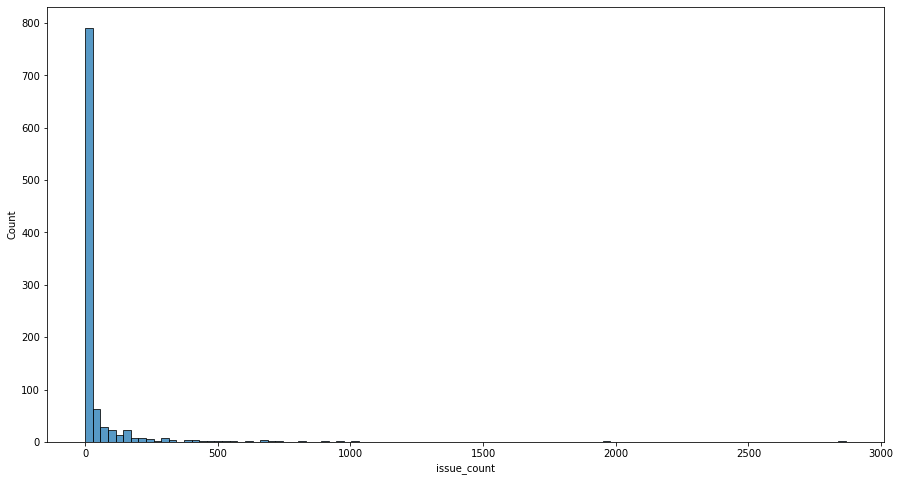

In [48]:
plt.figure(figsize=(15, 8))
sns.histplot(base_info.issue_count, bins=100)
plt.show()

In [54]:
def func(x):
    bias = 0 if x.elapsed_time > 1000 else 1000
    
    return x.issue_count / (bias + x.elapsed_time)

base_info["issue_per_day_biased"] = base_info.apply(func, axis=1)

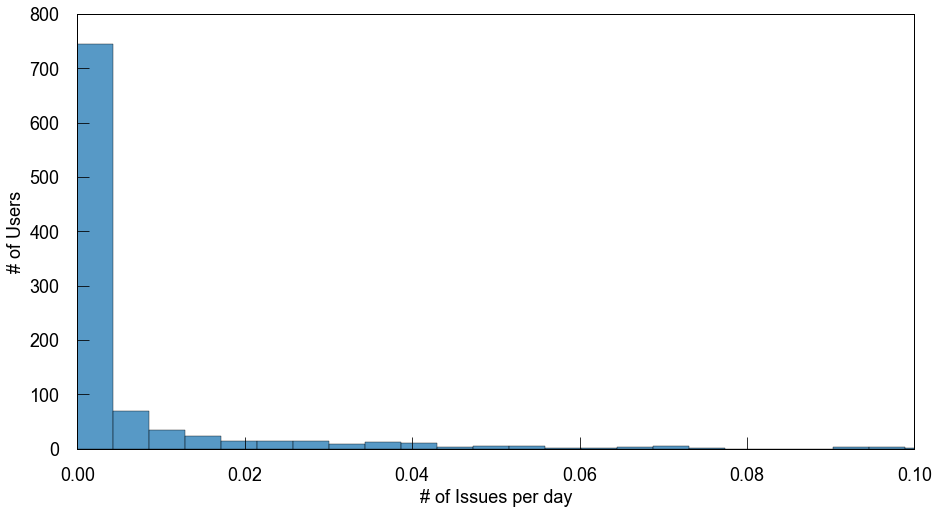

In [22]:
plt.figure(figsize=(15, 8))
sns.histplot(base_info.issue_per_day_biased, bins=200)
plt.xlabel("# of Issues per day", fontsize=18)
plt.ylabel("# of Users", fontsize=18)
plt.xlim(0, 0.1)
plt.ylim(0, 800)
plt.savefig("./issue_per_day.svg", transparent=True)
plt.show()

In [59]:
data_corr = base_info.corr()
data_corr

,star,elapsed_time,star_per_day,star_per_day_biased,issue_count,issue_per_day_biased
star,1.000000,0.149565,0.999125,0.999141,0.131752,0.105185
elapsed_time,0.149565,1.000000,0.145239,0.144849,0.135689,0.084608
star_per_day,0.999125,0.145239,1.000000,0.999991,0.130035,0.105023
star_per_day_biased,0.999141,0.144849,0.999991,1.000000,0.130181,0.105155
issue_count,0.131752,0.135689,0.130035,0.130181,1.000000,0.954261
issue_per_day_biased,0.105185,0.084608,0.105023,0.105155,0.954261,1.000000


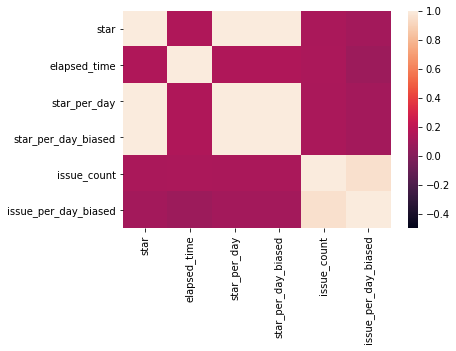

In [61]:
sns.heatmap(data_corr, vmin=-.5, vmax=1)
plt.show()

Issue の数と Star の数の間の相関係数は 0.10 程度、つまり Star の数と Issue の数は独立した指標として使うことが可能であることが確かめられた。

In [65]:
print(f"Stdev biased: {stats.tstd(base_info.issue_per_day_biased):.4}")
print(f"Mean: {base_info.issue_per_day_biased.mean():.4}")
print(f"Median: {base_info.issue_per_day_biased.median():.4}")

Stdev biased: 0.04264
Mean: 0.01043
Median: 0.0003583


In [66]:
base_info.to_csv("user_info_1.csv", index=False)

### Pull Request の情報を取得

In [128]:
query = """
{
    user(login: "Hayashi-Yudai") {
        pullRequests(first: 3, orderBy: {direction: DESC, field: CREATED_AT}) {
            totalCount
            nodes {
                id
                repository {
                    name
                }
                closed
                reviews {
                    totalCount
                }
                commits(first: 100) {
                    nodes {
                        commit {
                            additions
                            changedFiles
                            deletions
                        }
                    }
                }
            }
        }
    }
}
"""
result = run_query(query) # Execute the query
result

{'data': {'user': {'pullRequests': {'totalCount': 86,
    'nodes': [{'id': 'MDExOlB1bGxSZXF1ZXN0NDkwMjYxOTY5',
      'repository': {'name': 'HouseKeepingBook'},
      'closed': True,
      'reviews': {'totalCount': 0},
      'commits': {'nodes': [{'commit': {'additions': 17,
          'changedFiles': 4,
          'deletions': 21}},
        {'commit': {'additions': 2, 'changedFiles': 1, 'deletions': 2}},
        {'commit': {'additions': 106, 'changedFiles': 8, 'deletions': 122}},
        {'commit': {'additions': 6, 'changedFiles': 3, 'deletions': 1}}]}},
     {'id': 'MDExOlB1bGxSZXF1ZXN0NDY4NDA5OTA0',
      'repository': {'name': 'EasyPaper'},
      'closed': True,
      'reviews': {'totalCount': 1},
      'commits': {'nodes': [{'commit': {'additions': 2950,
          'changedFiles': 2,
          'deletions': 3084}},
        {'commit': {'additions': 34, 'changedFiles': 2, 'deletions': 1}},
        {'commit': {'additions': 79, 'changedFiles': 1, 'deletions': 0}},
        {'commit': {'add

In [13]:
pr_ids = []
total_cnts = []
usernames = []
repositories = []
are_closed = []

pr_ids_commit = []
additions = []
deletions = []
changed_files = []

for user in tqdm(base_info.username):
    query = "{\n  user(login: " + f'"{user}"'+ ") {" +\
        """
            pullRequests(first: 100, orderBy: {direction: DESC, field: CREATED_AT}) {
                totalCount
                    nodes {
                        id
                        repository {
                            name
                        }
                        closed
                        commits(first: 100) {
                            nodes {
                                commit {
                                    additions
                                    changedFiles
                                    deletions
                                }
                            }
                        }
                    }
                }
            }
        }
        """
    try:
        resp = run_query(query)["data"]["user"]["pullRequests"]
    except:
        continue
    
    for node in resp["nodes"]:
        ID = node["id"]
        total_cnt = resp["totalCount"]
        username = user
        repository_name = node["repository"]["name"]
        is_closed = node["closed"]
        
        for commit in node["commits"]["nodes"]:
            addition = commit["commit"]["additions"]
            deletion = commit["commit"]["deletions"]
            changed_file = commit["commit"]["changedFiles"]
            
            pr_ids_commit.append(ID)
            additions.append(addition)
            deletions.append(deletion)
            changed_files.append(changed_file)
        
        pr_ids.append(ID)
        total_cnts.append(total_cnt)
        usernames.append(username)
        repositories.append(repository_name)
        are_closed.append(is_closed)

In [15]:
pr_infos = pd.DataFrame({
    "id": pr_ids,
    "username": usernames,
    "total_pr_cnt": total_cnts,
    "repository_name": repositories,
    "is_closed": are_closed,
})

pr_infos.to_csv("PR_info.csv", index=False)
pr_infos.head()

,id,username,total_pr_cnt,repository_name,is_closed
0,MDExOlB1bGxSZXF1ZXN0Mjc0MDk5NTYz,collymore,9,vue-storefront,True
1,MDExOlB1bGxSZXF1ZXN0MjY3MTA2NjQ2,collymore,9,vsf-wp,True
2,MDExOlB1bGxSZXF1ZXN0MjQyNDMwOTI1,collymore,9,Mage2Gen,True
3,MDExOlB1bGxSZXF1ZXN0MjQyNDI4OTYy,collymore,9,Mage2Gen,True
4,MDExOlB1bGxSZXF1ZXN0MjM3ODM3MzMy,collymore,9,awesome-vue-storefront,True


In [16]:
pr_commit_info = pd.DataFrame({
    "id": pr_ids_commit,
    "changed_files": changed_files,
    "additions": additions,
    "deletions": deletions,
})

pr_commit_info.to_csv("PR_commit_info.csv", index=False)
pr_commit_info.head()

,id,changed_files,additions,deletions
0,MDExOlB1bGxSZXF1ZXN0Mjc0MDk5NTYz,1,7,0
1,MDExOlB1bGxSZXF1ZXN0Mjc0MDk5NTYz,1,1,0
2,MDExOlB1bGxSZXF1ZXN0Mjc0MDk5NTYz,1,20,18
3,MDExOlB1bGxSZXF1ZXN0Mjc0MDk5NTYz,1,1,0
4,MDExOlB1bGxSZXF1ZXN0Mjc0MDk5NTYz,7,97,81


In [22]:
pr_add_delete = pr_commit_info.groupby("id").sum().reset_index()
pr_add_delete.head()

,id,changed_files,additions,deletions
0,MDExOlB1bGxSZXF1ZXN0MTA0MDY5NjY5,48,782,503
1,MDExOlB1bGxSZXF1ZXN0MTA0MDg0,1,1,1
2,MDExOlB1bGxSZXF1ZXN0MTA0MDk4MTI=,1,1,2
3,MDExOlB1bGxSZXF1ZXN0MTA0MDkzMjA5,1,8,9
4,MDExOlB1bGxSZXF1ZXN0MTA0MDkzODE2,1,12,0


In [24]:
username_pr_changes = pd.merge(pr_infos[["id", "username"]], pr_add_delete, on="id", how="inner")

In [25]:
username_pr_changes.head()

,id,username,changed_files,additions,deletions
0,MDExOlB1bGxSZXF1ZXN0Mjc0MDk5NTYz,collymore,11,126,99
1,MDExOlB1bGxSZXF1ZXN0MjY3MTA2NjQ2,collymore,51,1528,253
2,MDExOlB1bGxSZXF1ZXN0MjQyNDMwOTI1,collymore,2,6,3
3,MDExOlB1bGxSZXF1ZXN0MjQyNDI4OTYy,collymore,1,1,1
4,MDExOlB1bGxSZXF1ZXN0MjM3ODM3MzMy,collymore,1,0,1


In [26]:
avg_add_delete_by_user = username_pr_changes[["username", "additions", "deletions"]].groupby("username").mean()
avg_add_delete_by_user.head()

,additions,deletions
username,,
Anks,17.312500,4.437500
Auswaschbar,218.500000,5.000000
BrianMowrey,86.857143,5.857143
CHH,192.301887,65.396226
Chouser,657.000000,89.750000


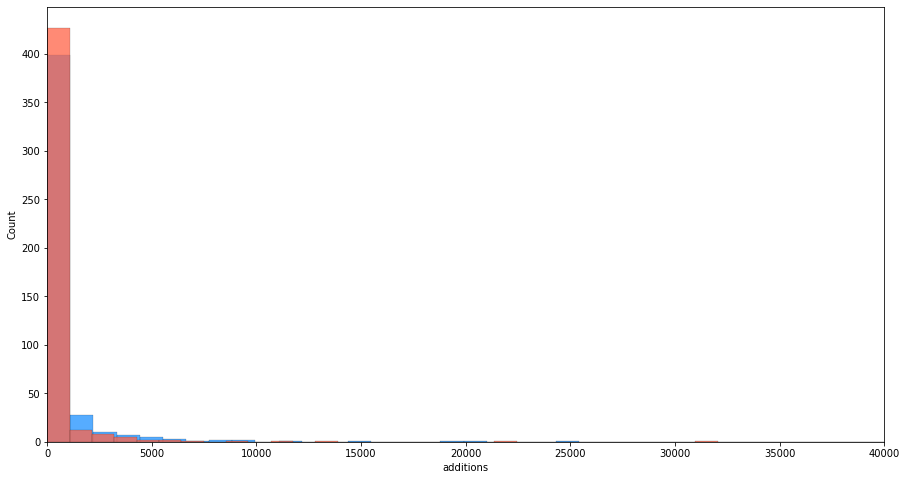

In [35]:
plt.figure(figsize=(15, 8))
sns.histplot(avg_add_delete_by_user.additions, bins=500, color="dodgerblue")
sns.histplot(avg_add_delete_by_user.deletions, bins=500, color="tomato")
plt.xlim(0, 40000)
plt.show()

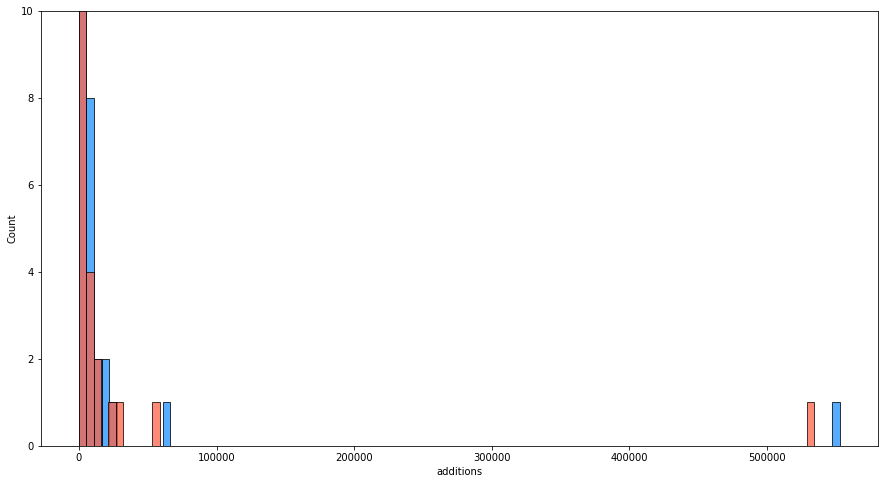

In [40]:
plt.figure(figsize=(15, 8))
sns.histplot(avg_add_delete_by_user.additions, bins=100, color="dodgerblue")
sns.histplot(avg_add_delete_by_user.deletions, bins=100, color="tomato")
plt.ylim(0, 10)
plt.show()

In [42]:
user_info_with_changes = pd.merge(base_info, avg_add_delete_by_user.reset_index(), on="username", how="inner")
user_info_with_changes[["star_per_day_biased", "issue_per_day_biased", "additions", "deletions"]].corr()

,star_per_day_biased,issue_per_day_biased,additions,deletions
star_per_day_biased,1.000000,0.109692,0.002326,0.001200
issue_per_day_biased,0.109692,1.000000,-0.004483,-0.003820
additions,0.002326,-0.004483,1.000000,0.994606
deletions,0.001200,-0.003820,0.994606,1.000000


#### 純粋な PR の数を見てみる

In [114]:
pr_infos[["username", "total_pr_cnt"]].drop_duplicates().to_csv("PR_counts.csv", index=False)

In [115]:
pr_cnts = pd.read_csv("PR_counts.csv")
pr_cnts.head()

,username,total_pr_cnt
0,collymore,9
1,bytheway,20
2,schulzp,21
3,nilclass,113
4,pphetra,4


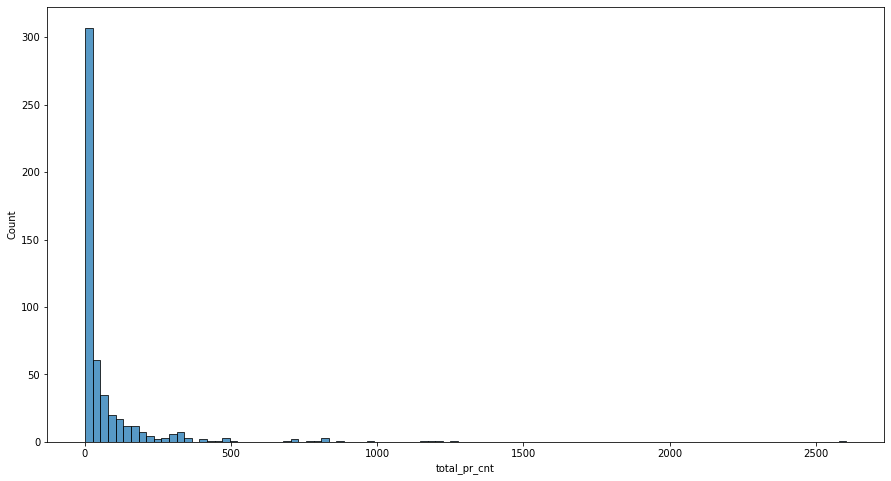

In [117]:
plt.figure(figsize=(15, 8))
sns.histplot(pr_cnts.total_pr_cnt, bins=100)
plt.show()

In [120]:
user_info_with_pr = pd.merge(base_info, pr_cnts, on="username", how="inner")

In [121]:
user_info_with_pr.head()

,username,star,created_at,updated_at,elapsed_time,star_per_day,star_per_day_biased,issue_count,issue_per_day_biased,total_pr_cnt
0,collymore,8,2009-02-19 16:16:06,2020-09-26 11:37:56,4236,0.001889,0.001889,7,0.001653,9
1,bytheway,958,2008-04-04 17:43:29,2020-09-24 13:30:55,4555,0.210318,0.210318,11,0.002415,20
2,schulzp,6,2008-05-21 13:54:26,2020-09-16 08:26:15,4500,0.001333,0.001333,16,0.003556,21
3,nilclass,118,2009-07-14 17:28:37,2020-09-03 08:15:35,4068,0.029007,0.029007,94,0.023107,113
4,pphetra,68,2008-02-28 03:55:13,2020-09-23 02:59:13,4590,0.014815,0.014815,0,0.000000,4


In [122]:
def func(x):
    bias = 0 if x.elapsed_time > 1000 else 1000
    
    return x.total_pr_cnt / (bias + x.elapsed_time)

user_info_with_pr["pr_per_day_biased"] = user_info_with_pr.apply(func, axis=1)

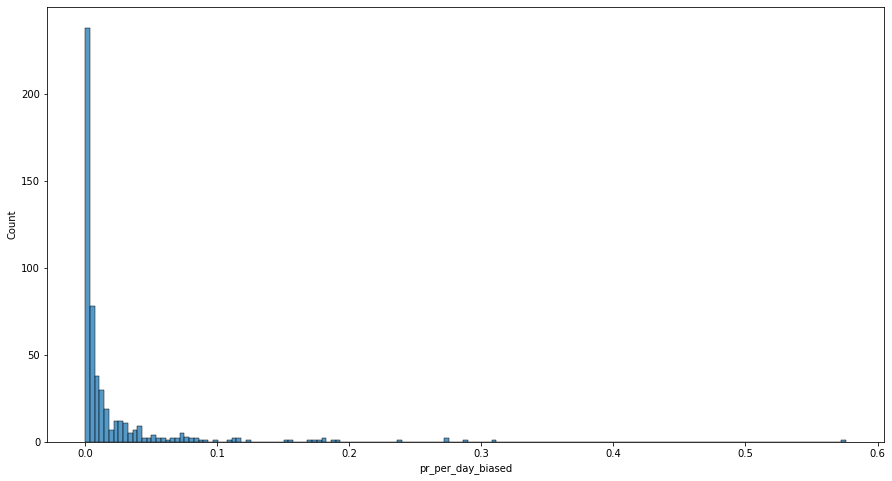

In [123]:
plt.figure(figsize=(15, 8))
sns.histplot(user_info_with_pr.pr_per_day_biased)
plt.show()

In [125]:
corr = user_info_with_pr[["star_per_day_biased", "issue_per_day_biased", "pr_per_day_biased"]].corr()
corr

,star_per_day_biased,issue_per_day_biased,pr_per_day_biased
star_per_day_biased,1.000000,0.063251,0.070557
issue_per_day_biased,0.063251,1.000000,0.501575
pr_per_day_biased,0.070557,0.501575,1.000000


Issue の数と PR の数の相関はやはり強い(0.5ある)。